Atelier 1 NLP 

Starting with this code, you will embark on a step-by-step journey through web scraping and the implementation of natural language processing (NLP) algorithms.

The initial phase focuses on testing the connection and scraping data from the e-quran website. It concludes with the storage of the raw data in a MongoDB database, which is a NoSQL database.

In [2]:
from bs4 import BeautifulSoup
import requests
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')
db = client['test']
collection = db['test']

def scrape_data():
    url = 'https://e-quran.com/w2.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

def extract_data(soup):
    table = soup.find('table', class_='MsoTableGrid')
    if table:
        rows = table.find_all('tr')
        extracted_data = []
        for row in rows:
            cells = row.find_all('td')
            row_data = [cell.get_text(strip=True) for cell in cells]
            extracted_data.append(row_data)
    else:
        print("Table with class MsoTableGrid not found")
        extracted_data = None
    return extracted_data

def save_to_mongodb(data):
    if data:
        for row in data:
            data_dict = {f'Column_{i}': cell for i, cell in enumerate(row)}
            collection.insert_one(data_dict)
        print("Data saved successfully!")
    else:
        print("No data to save")


soup = scrape_data()
table_data = extract_data(soup)
save_to_mongodb(table_data)


Data saved successfully!


Moving forward, i have chossen the data to be displayed as JSON file .

In [11]:
import json
def display_data():
    cursor = collection.find()
    for document in cursor:
        document['_id'] = str(document['_id'])
        for key, value in document.items():
            if isinstance(value, bytes):
                document[key] = value.decode('utf-8')
        print(json.dumps(document, ensure_ascii=False, indent=4))

In [12]:
display_data()

{
    "_id": "6611533eddf441a12943fcbb",
    "Column_0": "Ø§ÙØ¢ÙØ©",
    "Column_1": "Ø§ÙÙÙÙØ©",
    "Column_2": "Ø§ÙØªÙØ³ÙØ±"
}
{
    "_id": "6611533eddf441a12943fcbc",
    "Column_0": "2",
    "Column_1": "Ø°ÙÙ Ø§ÙÙØªØ§Ø¨",
    "Column_2": "Ø§ÙÙØ±Ø¢Ù Ø§ÙØ¹Ø¸ÙÙ"
}
{
    "_id": "6611533eddf441a12943fcbd",
    "Column_0": "2",
    "Column_1": "ÙØ§Ø±ÙØ¨ ÙÙÙ",
    "Column_2": "ÙØ§Ø´Ù ÙÙ Ø£ÙÙ Ø­ÙÙ\r\n  ÙÙ Ø¹ÙØ¯ Ø§ÙÙÙ"
}
{
    "_id": "6611533eddf441a12943fcbe",
    "Column_0": "2",
    "Column_1": "ÙØ¯Ù",
    "Column_2": "ÙØ§Ø¯Ù ÙÙ Ø§ÙØ¶ÙØ§ÙØ©"
}
{
    "_id": "6611533eddf441a12943fcbf",
    "Column_0": "2",
    "Column_1": "ÙÙÙØªÙÙÙ",
    "Column_2": "Ø§ÙØ°ÙÙ ØªØ¬ÙØ¨ÙØ§ Ø§ÙÙØ¹Ø§ØµÙ\r\n  ÙØ£Ø¯ÙÙØ§ Ø§ÙÙØ±Ø§Ø¦Ø¶ ÙÙÙÙØ§ Ø£ÙÙØ³ÙÙ Ø§ÙØ¹Ø°Ø§Ø¨"
}
{
    "_id": "6611533eddf441a12943fcc0",
    "Column_0": "5",
    "Column_1": "Ø¹ÙÙ ÙØ¯Ù",
    "Column_2": "Ø¹ÙÙ Ø±Ø´Ø§Ø¯ ÙÙÙØ±\r\n  ÙÙÙÙÙ"
}
{
    "_id": "6611533eddf

As noticed, although the data is in Arabic, it has been stored and encoded in a different character set.

In [17]:
import requests
from bs4 import BeautifulSoup

def scrape_data():
    url = 'https://e-quran.com/w2.html'
    headers = {
        'Accept-Language': 'ar',  
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        response.encoding = 'utf-8' 
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', class_='MsoTableGrid')
        if table:
            rows = table.find_all('tr')
            extracted_data = []
            for row in rows:
                cells = row.find_all('td')
                row_data = [cell.get_text(strip=True) for cell in cells]
                extracted_data.append(row_data)
            return extracted_data
        else:
            print("Table with class MsoTableGrid not found")
    else:
        print("Failed to fetch the webpage. Status code:", response.status_code)
    return None


scraped_data = scrape_data()
if scraped_data:
    print("Scraped Data:")
    for row in scraped_data:
        decoded_row = [text.encode().decode('utf-8') for text in row]
        print(decoded_row)
else:
    print("No data scraped.")


Scraped Data:
['الآية', 'الكلمة', 'التفسير']
['2', 'ذلك الكتاب', 'القرآن العظيم']
['2', 'لاريب فيه', 'لاشك في أنه حقّ\r\n  من عند الله']
['2', 'هدى', 'هادٍ من الضلالة']
['2', 'للمتقين', 'الذين تجنبوا المعاصي\r\n  وأدّوا الفرائض فوقوا أنفسهم العذاب']
['5', 'على هدى', 'على رشاد ونور\r\n  ويقين']
['7', 'ختم الله', 'طبع الله']
['7', 'غشاوة', 'غطاء وستر']
['9', 'يخادعون', 'يعملون عمل المخادع']
['10', 'مرض', 'شك ونفاق أو تكذيب\r\n  وجَحْد']
['14', 'خلوا إلى شياطينهم', 'انصرفوا إليهم\r\n  أو انفردوا معهم']
['15', 'يمدّهم', 'يزيدهم أو يمهلهم']
['15', 'طغيانهم', 'مجاوزتهم الحدّ\r\n  وغلوّهم في الكفر']
['15', 'يعمهون', 'يعمَونَ عن الرُّشد\r\n  أو يتحيّرون']
['17', 'مثلُهُم', 'حالُهُم العجيبة،\r\n  أو صفتهم']
['17', 'استوقد نارا', 'أوقدها']
['18', 'بكمٌ', 'خرسٌ عن النّطق\r\n  بالحق']
['19', 'كصيّبٍ', 'الصيّب: المطر\r\n  النازل أو السحاب']
['20', 'يخطفُ أبصارهم', 'يستلِبُها أو يذهب\r\n  بها بسرعة']
['20', 'قاموا', 'وقفوا وثبتوا في\r\n  أماكنهم متحيِّرين']
['22', 'الأرضَ فراشاً', 'بساطاً ووِطاءً\r\

Now that the data is displayed in its correct form following adjustments to the previous functions, we can proceed.

In [4]:
import requests
from bs4 import BeautifulSoup
from pymongo import MongoClient

def scrape_data():
    url = 'https://e-quran.com/w2.html'
    headers = {
        'Accept-Language': 'ar',  
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        response.encoding = 'utf-8' 
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', class_='MsoTableGrid')
        if table:
            rows = table.find_all('tr')
            extracted_data = []
            for row in rows:
                cells = row.find_all('td')
                row_data = [cell.get_text(strip=True) for cell in cells]
                extracted_data.append(row_data)
            return extracted_data
        else:
            print("Table with class MsoTableGrid not found")
    else:
        print("Failed to fetch the webpage. Status code:", response.status_code)
    return None

def save_to_mongodb(data):
    if data:
        client = MongoClient('mongodb://localhost:27017/')
        db = client['atelier1']
        collection = db['scraped_data']
        for row in data:

            row_dict = {f'Column_{i}': cell for i, cell in enumerate(row)}

            collection.insert_one(row_dict)
        print("Data saved successfully!")
        client.close()
    else:
        print("No data to save.")


def display_from_mongodb():
    client = MongoClient('mongodb://localhost:27017/')
    db = client['atelier1']
    collection = db['scraped_data']
    cursor = collection.find()
    for document in cursor:
        print(document)
    client.close()


scraped_data = scrape_data()
if scraped_data:
    save_to_mongodb(scraped_data)
    print("Scraped Data saved to MongoDB:")
    display_from_mongodb()
else:
    print("No data scraped.")


Data saved successfully!
Scraped Data saved to MongoDB:
{'_id': ObjectId('661155caddf441a12943fe25'), 'Column_1': 'الكلمة', 'Column_2': 'التفسير', 'Column_1_tokens': ['الكلمة'], 'Column_2_tokens': ['التفسير'], 'Column_1_stemmed_tokens': ['الكلمة'], 'Column_2_stemmed_tokens': ['التفسير'], 'Column_1_lemmatized_tokens': ['الكلمة'], 'Column_2_lemmatized_tokens': ['التفسير']}
{'_id': ObjectId('661155caddf441a12943fe26'), 'Column_1': 'ذلك الكتاب', 'Column_2': 'القرآن العظيم', 'Column_1_tokens': ['ذلك', 'الكتاب'], 'Column_2_tokens': ['القرآن', 'العظيم'], 'Column_1_stemmed_tokens': ['ذلك', 'الكتاب'], 'Column_2_stemmed_tokens': ['القرآن', 'العظيم'], 'Column_1_lemmatized_tokens': ['ذلك', 'الكتاب'], 'Column_2_lemmatized_tokens': ['القرآن', 'العظيم']}
{'_id': ObjectId('661155caddf441a12943fe27'), 'Column_1': 'لاريب فيه', 'Column_2': 'لاشك في أنه حقّ\r\n  من عند الله', 'Column_1_tokens': ['لاريب', 'فيه'], 'Column_2_tokens': ['لاشك', 'في', 'أنه', 'حقّ', 'من', 'عند', 'الله'], 'Column_1_stemmed_tokens

Now that the data has been successfully saved in MongoDB and a function has been programmed to display it from MongoDB, we can proceed to the next phase of our project.

In [6]:
from pymongo import MongoClient
import re
import string

import re

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    return text

def display_from_mongodb():
    client = MongoClient('mongodb://localhost:27017/')
    db = client['atelier1']
    collection = db['scraped_data']
    cursor = collection.find()
    for document in cursor:
        cleaned_document = {key: clean_text(value) for key, value in document.items()}
        print(cleaned_document)
    client.close()

if __name__ == "__main__":
    display_from_mongodb()


{'_id': ObjectId('661155caddf441a12943fe25'), 'Column_1': 'الكلمة', 'Column_2': 'التفسير', 'Column_1_tokens': ['الكلمة'], 'Column_2_tokens': ['التفسير'], 'Column_1_stemmed_tokens': ['الكلمة'], 'Column_2_stemmed_tokens': ['التفسير'], 'Column_1_lemmatized_tokens': ['الكلمة'], 'Column_2_lemmatized_tokens': ['التفسير']}
{'_id': ObjectId('661155caddf441a12943fe26'), 'Column_1': 'ذلك الكتاب', 'Column_2': 'القرآن العظيم', 'Column_1_tokens': ['ذلك', 'الكتاب'], 'Column_2_tokens': ['القرآن', 'العظيم'], 'Column_1_stemmed_tokens': ['ذلك', 'الكتاب'], 'Column_2_stemmed_tokens': ['القرآن', 'العظيم'], 'Column_1_lemmatized_tokens': ['ذلك', 'الكتاب'], 'Column_2_lemmatized_tokens': ['القرآن', 'العظيم']}
{'_id': ObjectId('661155caddf441a12943fe27'), 'Column_1': 'لاريب فيه', 'Column_2': 'لاشك في أنه حقّ من عند الله', 'Column_1_tokens': ['لاريب', 'فيه'], 'Column_2_tokens': ['لاشك', 'في', 'أنه', 'حقّ', 'من', 'عند', 'الله'], 'Column_1_stemmed_tokens': ['لاريب', 'فيه'], 'Column_2_stemmed_tokens': ['لاشك', 'في'

Here we have deleted numbers,white space etc ...

In [39]:
def drop_column(collection_name):
    client = MongoClient('mongodb://localhost:27017/')
    db = client['atelier1']
    collection = db['scraped_data']
    
    for document in collection.find():
    
        if 'Column_0' in document:
            del document['Column_0']
            
            collection.update_one({'_id': document['_id']}, {'$unset': {'Column_0': 1}})
    client.close()

In [40]:
 drop_column('scraped_data')

Following the column 0 that have got numbers and after being the numbers deleted it resulted this column t stay empty so i decided to drop it 

In [41]:
display_from_mongodb()

{'_id': ObjectId('661155caddf441a12943fe25'), 'Column_1': 'الكلمة', 'Column_2': 'التفسير', 'Column_1_tokens': ['الكلمة'], 'Column_2_tokens': ['التفسير']}
{'_id': ObjectId('661155caddf441a12943fe26'), 'Column_1': 'ذلك الكتاب', 'Column_2': 'القرآن العظيم', 'Column_1_tokens': ['ذلك', 'الكتاب'], 'Column_2_tokens': ['القرآن', 'العظيم']}
{'_id': ObjectId('661155caddf441a12943fe27'), 'Column_1': 'لاريب فيه', 'Column_2': 'لاشك في أنه حقّ من عند الله', 'Column_1_tokens': ['لاريب', 'فيه'], 'Column_2_tokens': ['لاشك', 'في', 'أنه', 'حقّ', 'من', 'عند', 'الله']}
{'_id': ObjectId('661155caddf441a12943fe28'), 'Column_1': 'هدى', 'Column_2': 'هادٍ من الضلالة', 'Column_1_tokens': ['هدى'], 'Column_2_tokens': ['هادٍ', 'من', 'الضلالة']}
{'_id': ObjectId('661155caddf441a12943fe29'), 'Column_1': 'للمتقين', 'Column_2': 'الذين تجنبوا المعاصي وأدّوا الفرائض فوقوا أنفسهم العذاب', 'Column_1_tokens': ['للمتقين'], 'Column_2_tokens': ['الذين', 'تجنبوا', 'المعاصي', 'وأدّوا', 'الفرائض', 'فوقوا', 'أنفسهم', 'العذاب']}
{'

In [42]:
from pymongo import MongoClient
from nltk.tokenize import word_tokenize

def tokenize_text(collection_name, *text_fields):
    client = MongoClient('mongodb://localhost:27017/')
    db = client['atelier1']
    collection = db['scraped_data']
    
    for document in collection.find():

        for field in text_fields:
            if field in document and isinstance(document[field], str):
                tokens = word_tokenize(document[field])

                collection.update_one({'_id': document['_id']}, {'$set': {f'{field}_tokens': tokens}})

    print("Tokenization completed for the specified fields.")
    
    client.close()

if __name__ == "__main__":

    tokenize_text('scraped_data', 'Column_1', 'Column_2') 


Tokenization completed for the specified fields.


In [8]:
from pymongo import MongoClient
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def remove_stopwords(collection_name, *token_fields):
    client = MongoClient('mongodb://localhost:27017/')
    db = client['atelier1']
    collection = db[collection_name]
    stop_words = set(stopwords.words('arabic'))

    for document in collection.find():
        for field in token_fields:
            if f'{field}_tokens' in document:
                tokens = document[f'{field}_tokens']
                filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
                collection.update_one({'_id': document['_id']}, {'$set': {f'{field}_filtered_tokens': filtered_tokens}})
    
    print("Stop words removal completed for the specified fields.")
    client.close()

  
remove_stopwords('scraped_data', 'Column_1', 'Column_2')  


Stop words removal completed for the specified fields.


[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing the arabic stop words 

In [44]:
from pymongo import MongoClient
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

def discretize_numerical_data(collection_name, *numerical_fields, num_bins=5):
    client = MongoClient('mongodb://localhost:27017/')
    db = client['atelier1']
    collection = db['scraped_data']
    
    for document in collection.find():
        for field in numerical_fields:
            if field in document and isinstance(document[field], (int, float)):
                data = np.array([[document[field]]])
                discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
                data_discretized = discretizer.fit_transform(data)
                collection.update_one({'_id': document['_id']}, {'$set': {f'{field}_discretized': data_discretized[0][0]}})
    print("Discretization completed for the specified numerical fields.")
    
    client.close()

if __name__ == "__main__":

    discretize_numerical_data('scraped_data', 'numerical_field1', 'numerical_field2', num_bins=5)  


Discretization completed for the specified numerical fields.


In [46]:
!pip3 install wordcloud matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 2.3 MB/s eta 0:00:00 0:00:01


Original Tokens: ['الكلمة', 'التفسير', 'ذلك', 'الكتاب', 'القرآن', 'العظيم', 'لاريب', 'فيه', 'لاشك', 'في', 'أنه', 'حقّ', 'من', 'عند', 'الله', 'هدى', 'هادٍ', 'من', 'الضلالة', 'للمتقين', 'الذين', 'تجنبوا', 'المعاصي', 'وأدّوا', 'الفرائض', 'فوقوا', 'أنفسهم', 'العذاب', 'على', 'هدى', 'على', 'رشاد', 'ونور', 'ويقين', 'ختم', 'الله', 'طبع', 'الله', 'غشاوة', 'غطاء', 'وستر', 'يخادعون', 'يعملون', 'عمل', 'المخادع', 'مرض', 'شك', 'ونفاق', 'أو', 'تكذيب', 'وجَحْد', 'خلوا', 'إلى', 'شياطينهم', 'انصرفوا', 'إليهم', 'أو', 'انفردوا', 'معهم', 'يمدّهم', 'يزيدهم', 'أو', 'يمهلهم', 'طغيانهم', 'مجاوزتهم', 'الحدّ', 'وغلوّهم', 'في', 'الكفر', 'يعمهون', 'يعمَونَ', 'عن', 'الرُّشد', 'أو', 'يتحيّرون', 'مثلُهُم', 'حالُهُم', 'العجيبة،', 'أو', 'صفتهم', 'استوقد', 'نارا', 'أوقدها', 'بكمٌ', 'خرسٌ', 'عن', 'النّطق', 'بالحق', 'كصيّبٍ', 'الصيّب', ':', 'المطر', 'النازل', 'أو', 'السحاب', 'يخطفُ', 'أبصارهم', 'يستلِبُها', 'أو', 'يذهب', 'بها', 'بسرعة', 'قاموا', 'وقفوا', 'وثبتوا', 'في', 'أماكنهم', 'متحيِّرين', 'الأرضَ', 'فراشاً', 'بساطاً'

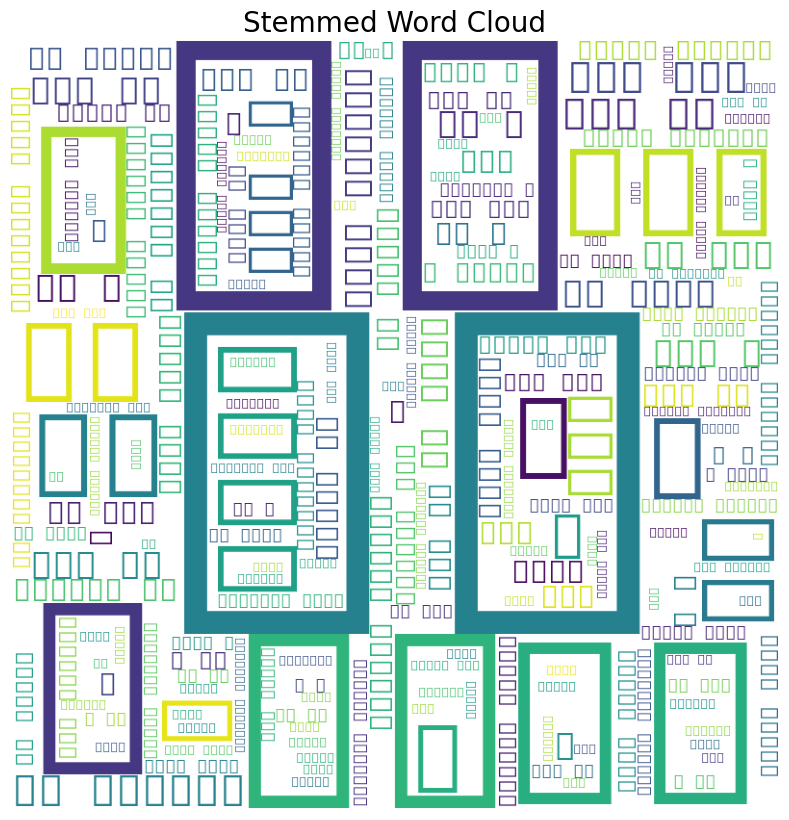

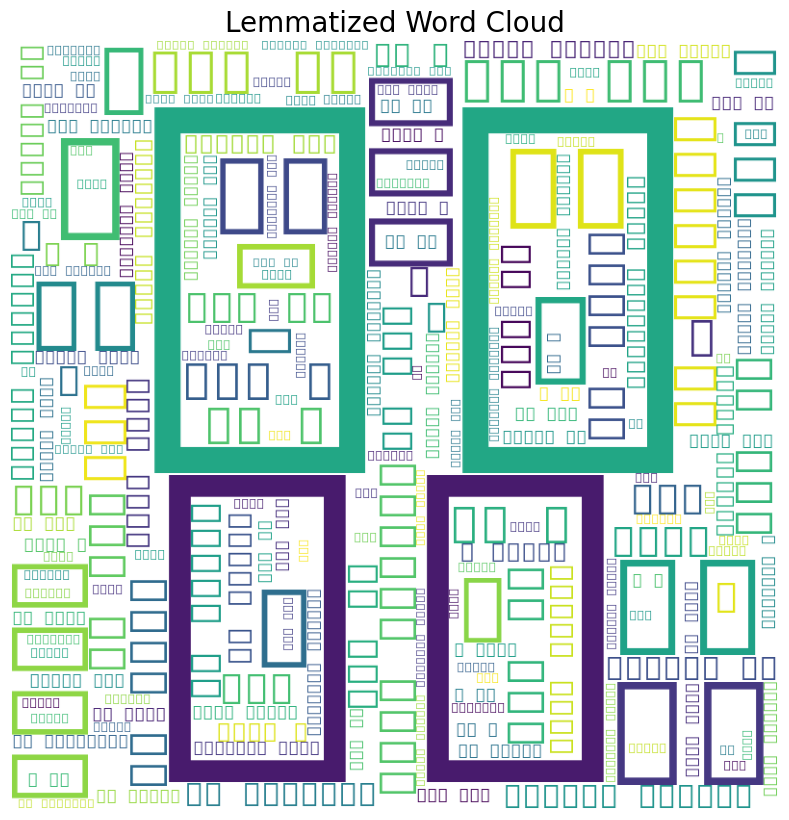

In [9]:
import nltk
from pymongo import MongoClient
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def stem_and_lemmatize(collection_name, *text_fields):
    client = MongoClient('mongodb://localhost:27017/')
    db = client['atelier1']
    collection = db['scraped_data']
    original_tokens = []
    stemmed_tokens = []
    lemmatized_tokens = []

    for document in collection.find():
        for field in text_fields:
            if field in document and isinstance(document[field], str):
                text = document[field]
                tokens = nltk.word_tokenize(text)
                stemmed = [porter_stemmer.stem(token) for token in tokens]
                lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
                original_tokens.extend(tokens)
                stemmed_tokens.extend(stemmed)
                lemmatized_tokens.extend(lemmatized)

    print("Original Tokens:", original_tokens)
    print("Stemmed Tokens:", stemmed_tokens)
    print("Lemmatized Tokens:", lemmatized_tokens)
    client.close()
    stemmed_text = ' '.join(stemmed_tokens)
    lemmatized_text = ' '.join(lemmatized_tokens)
    create_word_cloud(stemmed_text, "Stemmed Word Cloud")
    create_word_cloud(lemmatized_text, "Lemmatized Word Cloud")

def create_word_cloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)
    
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.title(title, fontsize=20)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

if __name__ == "__main__":
    stem_and_lemmatize('scraped_data', 'Column_1', 'Column_2') 


This code processes text data from a MongoDB collection, applies stemming and lemmatization using NLTK, and generates word clouds for the resulting tokens. It leverages NLTK for text processing, pymongo for MongoDB interactions, and WordCloud for visualization.

In [50]:
import nltk
from pymongo import MongoClient
from nltk.stem import PorterStemmer, WordNetLemmatizer

porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def stem_text(collection_name, *text_fields):
    client = MongoClient('mongodb://localhost:27017/')
    db = client['atelier1']
    collection = db['scraped_data']

    for document in collection.find():
        for field in text_fields:
            if field in document and isinstance(document[field], str):
                text = document[field]
                tokens = nltk.word_tokenize(text)
                stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
                collection.update_one({'_id': document['_id']}, {'$set': {f'{field}_stemmed_tokens': stemmed_tokens}})
    print("Stemming completed for the specified text fields.")
    client.close()

def lemmatize_text(collection_name, *text_fields):
    client = MongoClient('mongodb://localhost:27017/')
    db = client['atelier1']
    collection = db[collection_name]

    for document in collection.find():
        for field in text_fields:
            if field in document and isinstance(document[field], str):
                text = document[field]
                tokens = nltk.word_tokenize(text)
                lemmatized_tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
                collection.update_one({'_id': document['_id']}, {'$set': {f'{field}_lemmatized_tokens': lemmatized_tokens}})
    
    print("Lemmatization completed for the specified text fields.")
    client.close()

stem_text('scraped_data', 'Column_1', 'Column_2') 
lemmatize_text('scraped_data', 'Column_1', 'Column_2')


Stemming completed for the specified text fields.
Lemmatization completed for the specified text fields.


Stemmed Tokens: ['الكلمة', 'التفسير', 'ذلك', 'الكتاب', 'القرآن', 'العظيم', 'لاريب', 'فيه', 'لاشك', 'في', 'أنه', 'حقّ', 'من', 'عند', 'الله', 'هدى', 'هادٍ', 'من', 'الضلالة', 'للمتقين', 'الذين', 'تجنبوا', 'المعاصي', 'وأدّوا', 'الفرائض', 'فوقوا', 'أنفسهم', 'العذاب', 'على', 'هدى', 'على', 'رشاد', 'ونور', 'ويقين', 'ختم', 'الله', 'طبع', 'الله', 'غشاوة', 'غطاء', 'وستر', 'يخادعون', 'يعملون', 'عمل', 'المخادع', 'مرض', 'شك', 'ونفاق', 'أو', 'تكذيب', 'وجَحْد', 'خلوا', 'إلى', 'شياطينهم', 'انصرفوا', 'إليهم', 'أو', 'انفردوا', 'معهم', 'يمدّهم', 'يزيدهم', 'أو', 'يمهلهم', 'طغيانهم', 'مجاوزتهم', 'الحدّ', 'وغلوّهم', 'في', 'الكفر', 'يعمهون', 'يعمَونَ', 'عن', 'الرُّشد', 'أو', 'يتحيّرون', 'مثلُهُم', 'حالُهُم', 'العجيبة،', 'أو', 'صفتهم', 'استوقد', 'نارا', 'أوقدها', 'بكمٌ', 'خرسٌ', 'عن', 'النّطق', 'بالحق', 'كصيّبٍ', 'الصيّب', ':', 'المطر', 'النازل', 'أو', 'السحاب', 'يخطفُ', 'أبصارهم', 'يستلِبُها', 'أو', 'يذهب', 'بها', 'بسرعة', 'قاموا', 'وقفوا', 'وثبتوا', 'في', 'أماكنهم', 'متحيِّرين', 'الأرضَ', 'فراشاً', 'بساطاً',

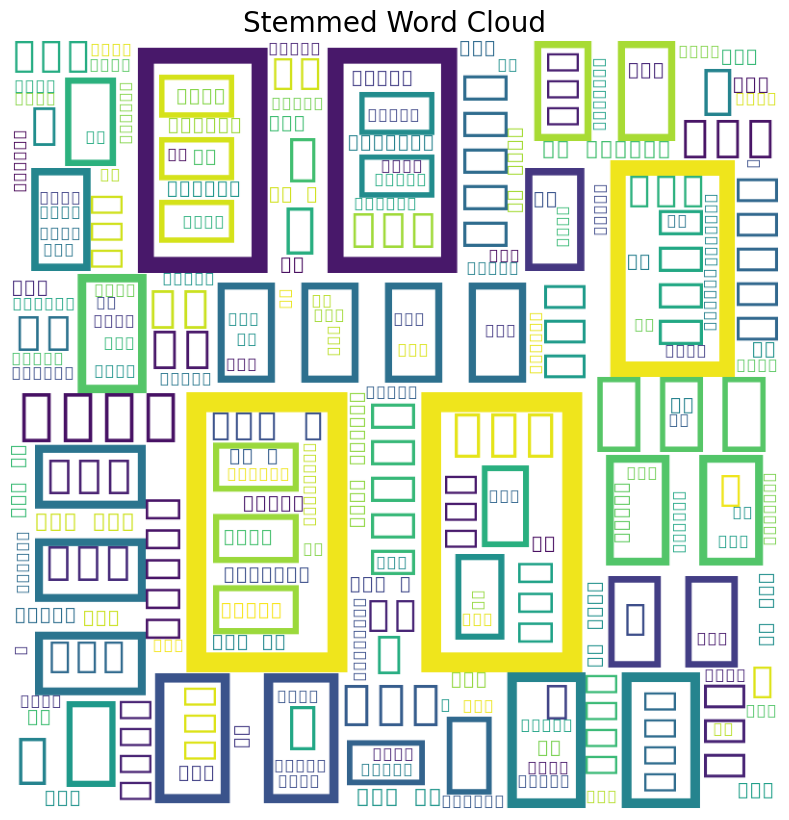

Lemmatized Tokens: ['الكلمة', 'التفسير', 'ذلك', 'الكتاب', 'القرآن', 'العظيم', 'لاريب', 'فيه', 'لاشك', 'في', 'أنه', 'حقّ', 'من', 'عند', 'الله', 'هدى', 'هادٍ', 'من', 'الضلالة', 'للمتقين', 'الذين', 'تجنبوا', 'المعاصي', 'وأدّوا', 'الفرائض', 'فوقوا', 'أنفسهم', 'العذاب', 'على', 'هدى', 'على', 'رشاد', 'ونور', 'ويقين', 'ختم', 'الله', 'طبع', 'الله', 'غشاوة', 'غطاء', 'وستر', 'يخادعون', 'يعملون', 'عمل', 'المخادع', 'مرض', 'شك', 'ونفاق', 'أو', 'تكذيب', 'وجَحْد', 'خلوا', 'إلى', 'شياطينهم', 'انصرفوا', 'إليهم', 'أو', 'انفردوا', 'معهم', 'يمدّهم', 'يزيدهم', 'أو', 'يمهلهم', 'طغيانهم', 'مجاوزتهم', 'الحدّ', 'وغلوّهم', 'في', 'الكفر', 'يعمهون', 'يعمَونَ', 'عن', 'الرُّشد', 'أو', 'يتحيّرون', 'مثلُهُم', 'حالُهُم', 'العجيبة،', 'أو', 'صفتهم', 'استوقد', 'نارا', 'أوقدها', 'بكمٌ', 'خرسٌ', 'عن', 'النّطق', 'بالحق', 'كصيّبٍ', 'الصيّب', ':', 'المطر', 'النازل', 'أو', 'السحاب', 'يخطفُ', 'أبصارهم', 'يستلِبُها', 'أو', 'يذهب', 'بها', 'بسرعة', 'قاموا', 'وقفوا', 'وثبتوا', 'في', 'أماكنهم', 'متحيِّرين', 'الأرضَ', 'فراشاً', 'بساطا

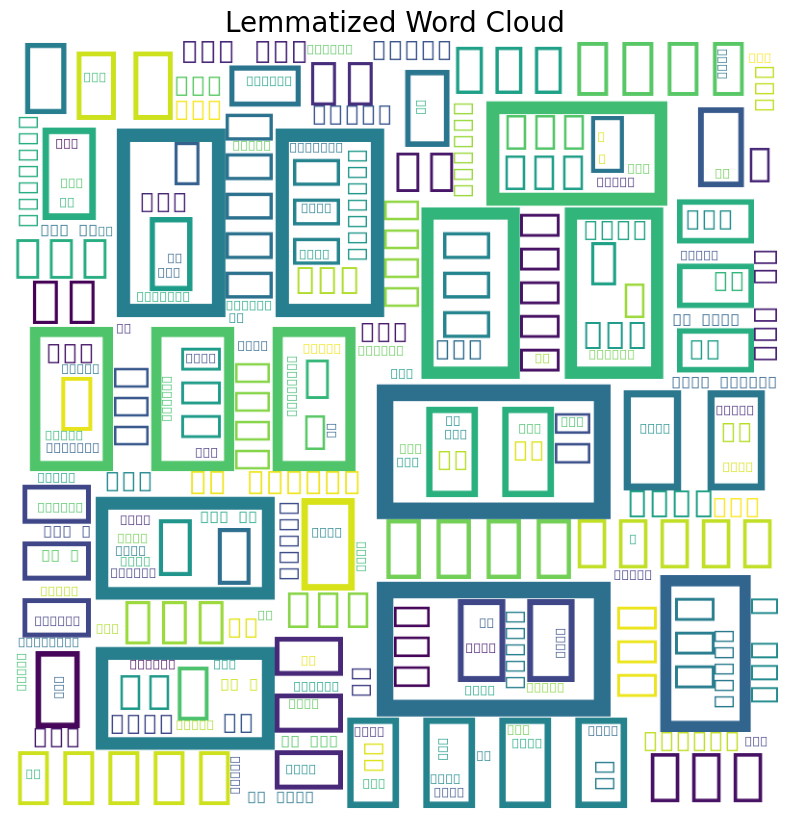

In [53]:
import nltk
from pymongo import MongoClient
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def stem_text(collection_name, *text_fields):
    client = MongoClient('mongodb://localhost:27017/')
    db = client['atelier1']
    collection = db['scraped_data']
    stemmed_tokens = []

    for document in collection.find():
        for field in text_fields:
            if field in document and isinstance(document[field], str):
                text = document[field]
                tokens = nltk.word_tokenize(text)

                stemmed = [porter_stemmer.stem(token) for token in tokens]

                stemmed_tokens.extend(stemmed)
    print("Stemmed Tokens:", stemmed_tokens)
    client.close()


    stemmed_text = ' '.join(stemmed_tokens)
    create_word_cloud(stemmed_text, "Stemmed Word Cloud")
def lemmatize_text(collection_name, *text_fields):
    client = MongoClient('mongodb://localhost:27017/')
    db = client['atelier1']
    collection = db['scraped_data']

    lemmatized_tokens = []
    for document in collection.find():
        for field in text_fields:
            if field in document and isinstance(document[field], str):
                text = document[field]
                tokens = nltk.word_tokenize(text)
                lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
                lemmatized_tokens.extend(lemmatized)
    print("Lemmatized Tokens:", lemmatized_tokens)
    client.close()
    lemmatized_text = ' '.join(lemmatized_tokens)
    create_word_cloud(lemmatized_text, "Lemmatized Word Cloud")

def create_word_cloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)
    
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.title(title, fontsize=20)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

stem_text('scraped_data', 'Column_1', 'Column_2') 
lemmatize_text('scraped_data', 'Column_1', 'Column_2')


In [65]:
import nltk
from pymongo import MongoClient
from nltk.tokenize import word_tokenize
from nltk.tag import PerceptronTagger
from nltk.corpus import treebank
import random

client = MongoClient('mongodb://localhost:27017/')
db = client['atelier1']
collection = db['scraped_data']
nltk.download('treebank')
def rule_based_pos_tag(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags
def train_pos_tagger():
    tagged_sentences = treebank.tagged_sents()
    tagger = PerceptronTagger(load=False)
    tagger.train(tagged_sentences)
    return tagger

def ml_based_pos_tag(text, tagger):
    tokens = word_tokenize(text)
    pos_tags = tagger.tag(tokens)
    return pos_tags

if __name__ == "__main__":
    random_document = collection.aggregate([{"$sample": {"size": 1}}]).next()
    example_text = random_document['Column_1'] if random_document else None
    if example_text:
        print("Example Text:", example_text)
        print("\nRule-based POS tagging:")
        rule_based_tags = rule_based_pos_tag(example_text)
        print(rule_based_tags)
        print("\nMachine learning based POS tagging:")
        tagger = train_pos_tagger()
        ml_based_tags = ml_based_pos_tag(example_text, tagger)
        print(ml_based_tags)
    else:
        print("No data found in the MongoDB collection.")


[nltk_data] Downloading package treebank to /Users/mac/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Example Text: لا يبخس منه

Rule-based POS tagging:
[('لا', 'JJ'), ('يبخس', 'NNP'), ('منه', 'NN')]

Machine learning based POS tagging:
[('لا', 'NN'), ('يبخس', 'NNP'), ('منه', 'NN')]


In [64]:
import nltk
from pymongo import MongoClient
import random

client = MongoClient('mongodb://localhost:27017/')
db = client['atelier1']
collection = db['scraped_data']
nltk.download('maxent_ne_chunker')
nltk.download('words')
def ner_tagging(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    ner_tags = nltk.ne_chunk(pos_tags)
    return ner_tags

if __name__ == "__main__":
    random_document = collection.aggregate([{"$sample": {"size": 1}}]).next()
    example_text = random_document['Column_1'] if random_document else None
    if example_text:
        print("Example Text:", example_text)
        ner_tags = ner_tagging(example_text)
        print("\nNER Tags:")
        print(ner_tags)
    else:
        print("No data found in the MongoDB collection.")


Example Text: جُناحٌ

NER Tags:
(S جُناحٌ/NN)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/mac/nltk_data...
[nltk_data]   Package words is already up-to-date!
